# Medidas de tendencia central

### Media = $$ \frac{1}{N} \sum_{i=1}^N x_i  $$ 

### Mediana(impar) = $$ x_{(n+1)/2}^{\text{ordered}} $$

### Mediana(par) = $$ \frac{x_{n/2}^{\text{ordered}} + x_{n/2+1}^{\text{ordered}}}{2} $$

### Moda = $$ x_k $$ donde $$ \text{Freq}(x_k) = \max{(\text{Freq}(x_i))} $$ 

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

In [1]:
import pandas as pd 

df = pd.read_csv('cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


inspeccionemos el atributo de `price_usd` **(variable numérica continua)** de los autos listados en el dataset:

In [2]:
df['price_usd'].mean()

6639.971021255604

In [3]:
df['price_usd'].median()

4800.0

<AxesSubplot:ylabel='Frequency'>

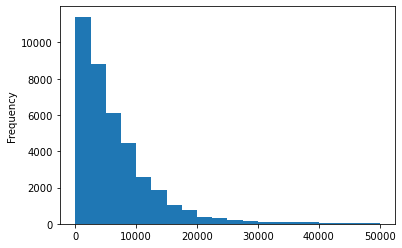

In [5]:
df['price_usd'].plot.hist(bins=20)

resulta más interesante analizar los precios por marcas: 

* **pro tip:** usar seaborn: https://seaborn.pydata.org/tutorial/distributions.html

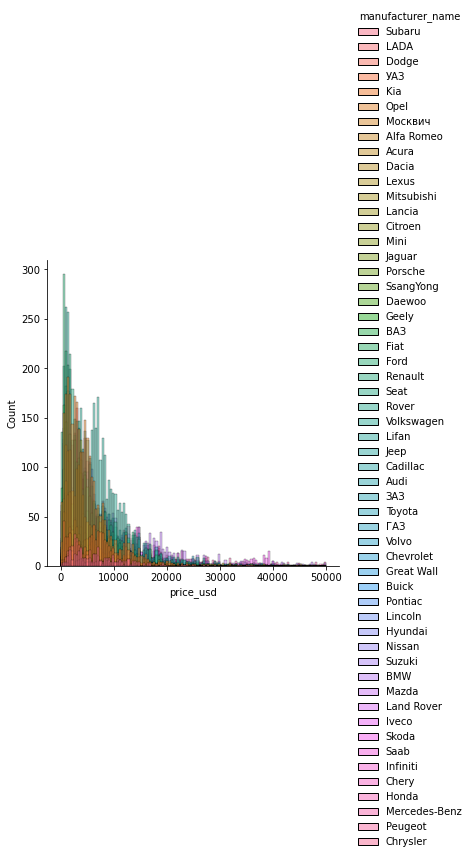

In [6]:
import seaborn as sns

sns.displot(df, x = 'price_usd', hue = 'manufacturer_name')
# x es la columna que queremos graficar
# hue es la columna que queremos agrupar. Agrupamos por marca.

El grafico pierde su proposito porque tiene mucha información. 
Con esto debemos buscar otra columna para agrupar y que nos aporte información mas relevante.

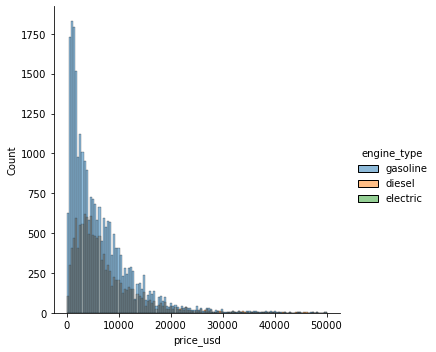

In [7]:
sns.displot(df, x="price_usd", hue="engine_type")

el histograma anterior es muy dificil de analizar, ¿donde están los autos eléctricos?

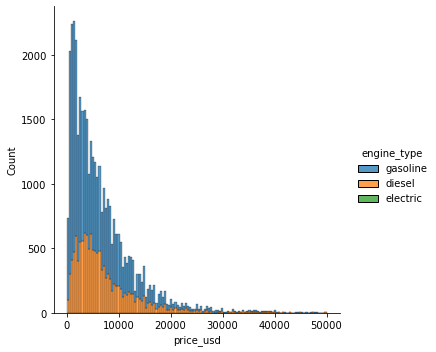

In [8]:
sns.displot(df, x='price_usd', hue = 'engine_type', multiple='stack')

No vemos la cantidad de autos electricos. Veamos porque, debe ser que hay pocos y en el gráfico no lo podemos visualizar.

In [9]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


**RETO:** Inspeccionemos precios de una marca y modelo particular !



<AxesSubplot:xlabel='price_usd', ylabel='Count'>

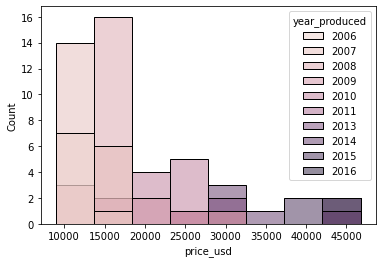

In [10]:
Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]
sns.histplot(Q7_df, x='price_usd', hue = 'year_produced')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [22]:
df[(df['manufacturer_name']=='Ford') & (df['year_produced'] > 2006)].groupby('model_name').count()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
model_name,,,,,,,,,,,,,,,,,,,,,
B-Max,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
C-Max,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
E450,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
EcoSport,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Edge,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Escape,66,66,66,66,66,66,66,66,66,66,...,66,66,66,66,66,66,66,66,66,66
Explorer,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
F150,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
F250,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:xlabel='price_usd', ylabel='Count'>

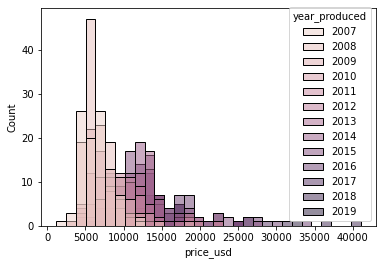

In [20]:
Q7_df = df[(df['manufacturer_name']=='Ford') & (df['year_produced'] > 2006)]
sns.histplot(Q7_df, x='price_usd', hue = 'year_produced')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=251bab9f-b364-464a-9227-b8b6e404dfd0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>